In [8]:
%matplotlib inline 

import numpy as np
import numpy.fft as fft
from scipy import signal as sg
from PIL import Image
from skimage import io

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.ndimage import filters, measurements as measure, morphology as morph
import sys
sys.path.append("/home/jovyan/")
from imtools import load_img, show_img, show_hist, resize_img
from edge_detect_lib import get_points, overlay_points, threshold

sys.path.append("/home/jovyan/signal_processing")
from sigtools import *

from ipywidgets import interact 

img = load_img("bearing_scrached_fuji_tunnel.jpg")

In [5]:
def bandpass_kernel(cutoff_low=20, cutoff_high=10, transition_band=40, sample_frequency = 1000):
  
    bandpass_1d = bandpass(cutoff_low, cutoff_high, transition_band, sample_frequency)
    bandpass_2d = np.outer(bandpass_1d, bandpass_1d)

    return bandpass_2d

Filter Length = 51


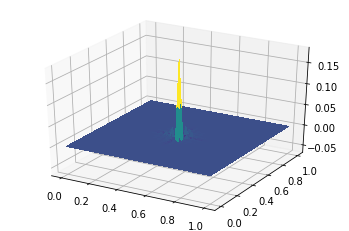

In [6]:
kernel = bandpass_kernel(cutoff_low=120, cutoff_high=10, transition_band=40, sample_frequency = 500)
_, size = kernel.shape
X, Y = np.meshgrid(np.linspace(0,1,size), np.linspace(0,1,size))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, kernel, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, aa=False)

In [18]:
def adjust_bandpass(cutoff_low=120, cutoff_high=10, transition_band=40):
    filtered_img = sg.convolve(bandpass_kernel(cutoff_low, cutoff_high, transition_band, sample_frequency=500), img, 'valid')
    io.imshow(filtered_img)
interact(adjust_bandpass, cutoff_low=(0,200), cutoff_high=(0,100), transition_band=(0,100))

interactive(children=(IntSlider(value=120, description='cutoff_low', max=200), IntSlider(value=10, description…

<function __main__.adjust_bandpass(cutoff_low=120, cutoff_high=10, transition_band=40)>

Filter Length = 167


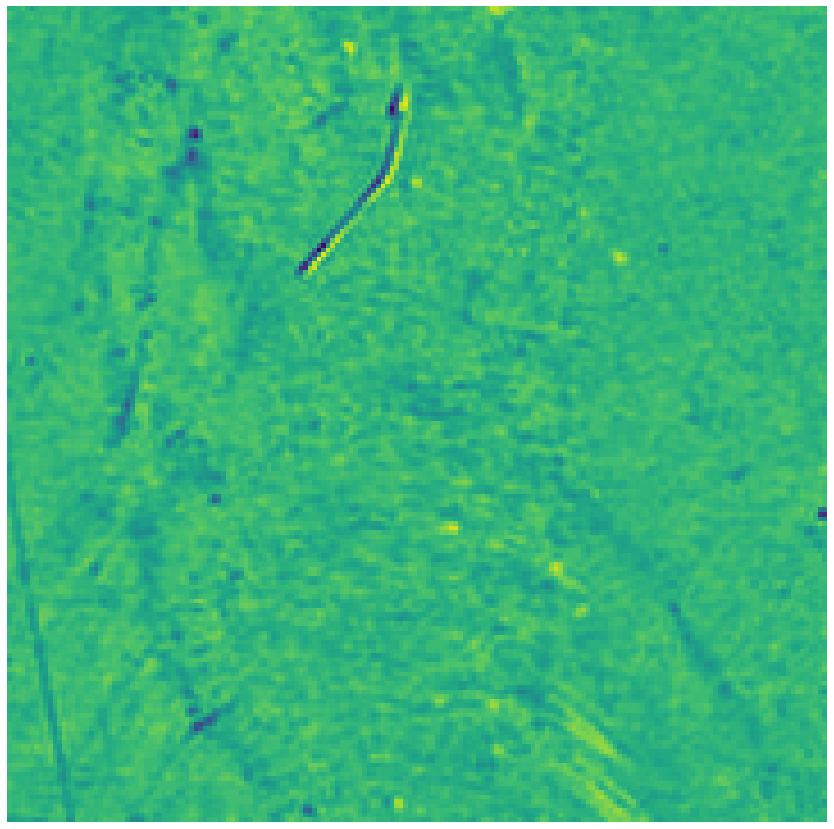

In [23]:
filtered_img = sg.convolve(bandpass_kernel(200, 3, 12, sample_frequency=500), img, 'valid')
show_img(filtered_img, color=True, size=(15,15))

In [ ]:
scratches = threshold(np.abs(filtered_img), .23, percent=True)
show_img(scratches,color=True,size=(12,12))

show_hist(scratches)

In [ ]:
fourier_raw = fft.fft2(filtered_img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 

In [ ]:
# Morphology
binary_img = scratches.astype(bool)  # make binary
#binary_img = np.logical_not(binary_img)  # invert

#struct_elem = morph.generate_binary_structure(2, 1)
#print(struct_elem.astype(int))

#scratches = morph.binary_dilation(binary_img, struct_elem, 1)

labels, num_obj = measure.label(binary_img)
show_img(labels, color=True, size=(10,10))
show_hist(labels)

measure.find_objects(labels,max_label=3)

In [ ]:
# Points
resized_img = resize_img(img, scratches.shape)
points = get_points(scratches, min_dist=10, allow_cluster=True)
overlay_points(resized_img, points, size=(10, 10))

In [ ]:
# Count 
labels, num_scraches = measure.label(scratches_dial)
print("Number of Scraches: ", num_scraches)